In [2]:
%matplotlib inline
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm


In [24]:
def draw():
    fig = plt.figure(figsize=plt.figaspect(0.5))
    axes = plt.axes()
    axes.set_ylim([0, 11])
    axes.set_xlim([0, 11])
    plt.gca().set_aspect('equal')

    plt.scatter(x1, x2, c=y)
    plt.title('Two classes')

    plt.show()

We have two classes of points. When we will get another point, how can we include it in one of the two classses?

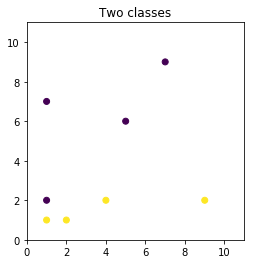

In [25]:
def step(x):
    return np.array(x > 0, dtype=np.int)

X=np.array([[1,2], [2,1],[1,7],[4,2],[5,6],[7,9], [9,2],[1,1]])
y=np.array([0, 1,0,1,0,0,1,1])

x1,x2=X[:,0],X[:,1]

draw()



Maybe by drawing a line (decision bordering ). A line can be described by equation ax+by+c=0 or y=mx+y0

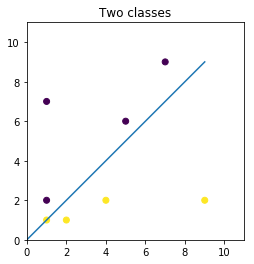

Slope (Panta dreptei):  1.0 , y intercept (y_0):  -0.0 
Value of ax+by+c:  [-0.5  0.5 -3.   1.  -0.5 -1.   3.5  0. ]
Real class:      [0 1 0 1 0 0 1 1]


In [27]:
a=0.5
b=-0.5
c=0

#Pentru dreapta ax+by+c=0
m=-a/b
y0=-c/b

fig = plt.figure(figsize=plt.figaspect(0.5))
axes = plt.axes()
axes.set_ylim([0, 11])
axes.set_xlim([0, 11])
plt.gca().set_aspect('equal')

plt.scatter(x1, x2, c=y)

t = np.arange(0.0, 10.0, 1)
plt.plot(t,m*t+y0)
plt.title('Two classes')

plt.show()

print('Slope (Panta dreptei): ',m,', y intercept (y_0): ', y0 , '\nValue of ax+by+c: ', a*x1+b*x2+c)
print('Real class:     ', y)

In [28]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
probs = sigmoid(a*x1+b*x2+c)
for prob, real_class,f ,x in zip(probs,y, a*x1+b*x2+c, X):
   print('Point  %s  Class   %s    % 2.2f    %2.2f  ' % (x, real_class, prob,  f))

Point  [1 2]  Class   0     0.38    -0.50  
Point  [2 1]  Class   1     0.62    0.50  
Point  [1 7]  Class   0     0.05    -3.00  
Point  [4 2]  Class   1     0.73    1.00  
Point  [5 6]  Class   0     0.38    -0.50  
Point  [7 9]  Class   0     0.27    -1.00  
Point  [9 2]  Class   1     0.97    3.50  
Point  [1 1]  Class   1     0.50    0.00  


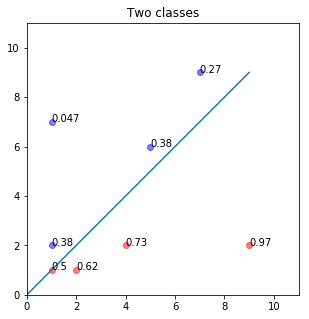

In [20]:
plt.figure(figsize=(5,5))
axes = plt.axes()
axes.set_ylim([0, 11])
axes.set_xlim([0, 11])
plt.gca().set_aspect('equal')
colors=['blue','red']
for i in range(0, X.shape[0]):
    xx, yy = x1[i], x2[i]
    plt.scatter(xx, yy, color=colors[y[i]], alpha=0.5)
    plt.text(xx+.001, yy+.001, '{:2.2}'.format(probs[i]), fontsize=10)

t = np.arange(0.0, 10.0, 1)
plt.plot(t,m*t+y0)
plt.title('Two classes')

plt.show()


### So, in order to do classifiction, we can learn a function that predicts the probability to be in one class.
What happens if we have classes which are not linearly separable?

## Let's see how can we compose more non-linear surfaces

In [30]:
X1 = np.arange(-5, 5, 0.25)
Y1 = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X1, Y1)



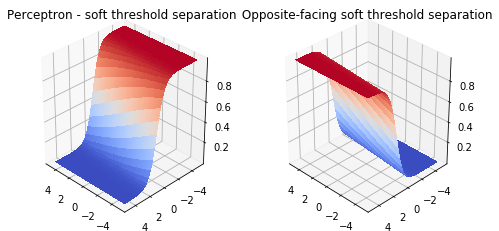

In [31]:
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 2, 1, projection='3d')

Z1=1/(1+np.exp(0.2*X+2*Y)) # two inputs, one output neuron (soft threshold)
Z2=1/(1+np.exp(-0.2*X-2*Y+1)) # oposing face soft threshold
surf = ax.plot_surface(X, Y, Z1, cmap=cm.coolwarm,linewidth=0, antialiased=False)

ax.set_title('Perceptron - soft threshold separation')
ax.view_init( elev=30, azim=135)

ax = fig.add_subplot(1, 2, 2, projection='3d')
surf = ax.plot_surface(X, Y, Z2, cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_title(' Opposite-facing soft threshold separation')
ax.view_init( elev=30, azim=135)

plt.show()

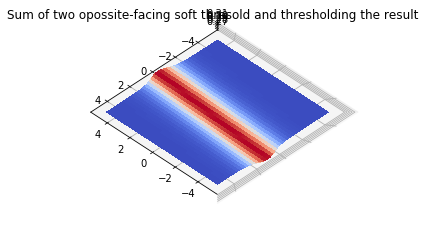

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, 1/(1+np.exp(Z1+Z2)), cmap=cm.coolwarm,linewidth=0, antialiased=False)
#surf = ax.plot_surface(X, Y, Z1+Z2, cmap=cm.coolwarm,linewidth=0, antialiased=False)

#two inputs, two sigmoid hidden neurons, one sigmoid output neuron
ax.set_title('Sum of two opossite-facing soft thresold and thresholding the result')
ax.view_init( elev=90, azim=135) # change elev to 30
plt.show()

## Let's see how Gradient Descent works for minimization of a function of a single variable

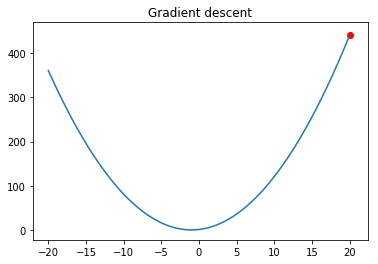

In [5]:
def f(x):
    return 1+ 2*x+x*x
def deriv_f(x):
    return 2+2*x
x_init = 20

t= np.arange(-20.0, 20.0, 0.1)
plt.plot(t,f(t)) 
plt.title('Gradient descent')
plt.scatter([x_init], [f(x_init)], color='red')
plt.show()

Derivata in 20 este 42.00
Derivata in 15.8 este 33.60
Derivata in 12.440000000000001 este 26.88
Derivata in 9.752 este 21.50
Derivata in 7.6016 este 17.20
Derivata in 5.88128 este 13.76
Derivata in 4.505024000000001 este 11.01
Derivata in 3.4040192000000005 este 8.81
Derivata in 2.5232153600000005 este 7.05
Derivata in 1.8185722880000004 este 5.64


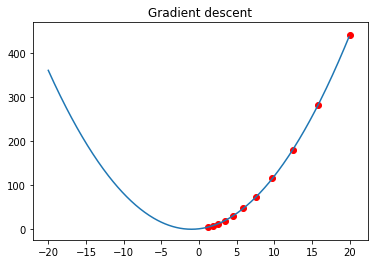

In [6]:
x=x_init
alpha=0.1

xs=np.array([x_init])

for i in range(0,10):
    print('Derivata in %s este %2.2f' % (x, deriv_f(x) ))
    x=x-alpha*deriv_f(x)
    xs=np.append(xs,x)

t= np.arange(-20.0, 20.0, 0.1)
plt.plot(t,f(t)) 
plt.title('Gradient descent')
plt.scatter(xs, f(xs), color='red')
plt.show()

